##### Facultad de Matemática, Física, Astronomía y Computación - Universidad Nacional de Córdoba
##### Curso de Posgrado
# Diseño de Software para Cómputo Científico
----

#### Presentación Trabajo Final

### PyForFluids: Cálculo de propiedades termodinámicas de Fluidos en base a ecuaciones de estado
---
**Alumnos:** 
 - Candelaria Arpajou
 - Federico Benelli

**Profesores:**
 - Juan Bautista Cabral
 - Martín Chalela

### Estructura de la presentación
---
- **Introducción**
- Modelos Termodinámicos
    - GERG-2008
- Arquitectura e implementación del paquete
    - Desarrollo en Fortran
    - Desarrollo en Python
    - Testing
    - Integración Continua
- Ejemplo de uso
- Conclusiones y perpectivas a futuro


### Introducción
----
- **propiedades termodinámicas** de fluidos de reservorio son fundamentales en procesos industriales.
- Sectores vinculados a la producción **impulsan** modelos capaces de predecir con exactitud las propiedades muchos compuestos.
- Existen numerosos simuladores comerciales capaces de predecir las propiedades termodinámicas de mezclas fluidas: gPROMS, ASPEN PLUS, entre otros.


**Principales desventajas de estos simuladores**.
 - Su licencia es muy costosa.
 - Son complejos de usar. Su completo entendimiento y manejo lleva tiempo.
 - Por lo general, no es posible acceder a las ecuaciones de los modelos que soportan.
 

![LogoAT](LogoAT.png) 

![LogoGP](LogoGP.png)
 
##### Alternativa: Desarrollo de programas open-source capaces de estimar propiedades termodinámicas de compuesto puros y mezclas

## PyForFluids
----
 - PyForFluids, abreviación de Python-Fortran-Fluids, es un paquete de Python destinado al cálculo de propiedades termodinámicas de fluidos.
 - Implementa la ecuación de estado GERG2008, escrita en código Fortran 95.
 - El programa en Fortran se integra al paquete de Python por medio de la herramienta F2Py. 

### Estructura de la presentación
---
- Introducción
- **Modelos Termodinámicos**
    - GERG-2008
- Arquitectura e implementación del paquete
    - Desarrollo en Fortran
    - Desarrollo en Python
    - Testing
    - Integración Continua
- Ejemplo de uso
- Conclusiones y perpectivas a futuro

### Modelos Termodinámicos
---
- Los modelos termodinámicos son desarrollos matemáticos que permiten conocer y evaluar el comportamiento termodinámico de un sistema bajo determinadas condiciones.
- Este sistema puede ser una sustancia pura o una mezcla.
- La ecuación de estado más simple es la llamada Ley de Gases Ideales:

$$ PV = RT $$

Existen numerosas ecuaciones de estado desarrolladas hasta el momento. Se las puede clasificar principalmente en 4 grupos:

  - **Cúbicas.** 
  - **SAFT.** 
  - **Multiparamétricas**. -> GERG2008
  - **Virial**.
  


### Modelos Termodinámicos
##### GERG2008
---
- Pensada para su aplicación en la industria del gas y petróleo.
- Función de la composición, densidad y temperatura.

$$ \alpha(\bar{x}, \rho, T) = \alpha^o(\bar{x}, \rho, T) + \alpha^r(\bar{x}, \rho, T)$$

- Hace uso de las derivadas de la energía de Helmoltz para calcular gran número de propiedades como la presión, calores específicos, coeficientes de fugacidad de la mezcla fluida.

La expresión matemática de la energía libre de Helmoltz posee dos términos:
- Primer término. **Energía de Helmholtz de gas ideal:**

$$ \alpha^o (\bar{x}, \rho, T) = \sum_{i=1}^{N} x_i\left[
    \alpha_i^o(\rho, T) + \ln x_i
    \right]$$

- Segundo término. **Energía de Helmholtz residual:**

$$ \label{eq:residual_term}
    \alpha^r(\bar{x}, \delta, \tau) = 
    \sum_{i=1}^N x_i \alpha_i^r(\delta, \tau) +
    \sum_{i=1}^{N-1}\sum_{j=i+1}^N x_i x_j F_{ij}\alpha_{ij}^r(\delta, \tau) $$


A su vez, el *término ideal* consiste en la combinación lineal de las energías de Helmholtz de gas ideal de los compuestos puros
sumado a la entropía de mezclado

$$ \alpha_i^o(\rho, T) = \ln \left(\frac{\rho}{\rho_{c,i}}\right) +
\frac{R^{*}}{R} \left[ n_{i,1} + n_{i,2} \frac{T_{c,i}}{T} + n_{i,3}\ln \left(\frac{T_{c,i}}{T}\right) \\ 
+ \sum_{k=4,6} n_{i,k}\ln\left(\left|\sinh\left(\vartheta_{i,k}\frac{T_c}{T}\right)\right|\right)\\
- \sum_{k=5,7} n_{i,k}\ln\left(
                  \cosh\left(\vartheta_{i,k}\frac{T_c}{T}\right)\right)\right] $$

El *término residual* consiste en la combinación lineal de la energía residual de compuestos puros ( $\alpha_i^r(\delta,\tau)$ ) y la combinación de interacciones binarias ( $\alpha_{ij}^r(\delta, \tau)$ ).

- $$ \alpha^r_i(\delta, \tau) = \sum_{k=1}^{K_{Pol,i}} n_{i,k}\delta^d_{i,k} \tau^{t_{i,k}} +
    \sum_{k=K_{Pol,i}+1}^{K_{Pol,i}+K_{Exp,i}} n_{i,k} \delta^d_{i,k}\tau^{t_{i,k}}e^{-\delta^{c_{i,k}}}$$

- $$ \alpha^r_{ij}(\delta, \tau) = 
\sum_{k=1}^{K_{Pol,ij} n_{ij,k}}\delta^{d_{ij,k}}\tau^{t_{ij,k}} 
+\sum_{k=K_{Pol,ij}+1}^{K_{Pol,ij}+K_{Exp,ij}}n_{ij,k}\delta^{d_{ij,k}}\tau^{t_{ij,k}} \\
\cdot\exp\left[-\eta_{ij, k}(\delta-\varepsilon_{ij,k})^2-\beta_{ij, k}(\delta-\gamma_{ij,k})\right]$$

El **término residual** es función de la densidad y temperatura reducidas ($\delta, \tau$). Estas últimas se calculan por medio de la densidad y temperatura reductoras, variables dependientes de la composición del sistema.

$$\delta = \frac{\rho}{\rho_r(\bar{x})}$$
$ $
$$ \frac{1}{\rho_r(\bar{x})} = \sum_{i=1}^N\sum_{j=1}^N 
    x_i x_j\beta_{\nu,ij}\gamma_{\nu,ij} \cdot
    \frac{x_i + x_j}{\beta_{\nu,ij}^2 x_i + x_j} \cdot
    \frac{1}{8} \left( \frac{1}{\rho_{c,i}^{1/3}} + \frac{1}{\rho_{c,j}^{1/3}}\right)^3 $$
$ $ 
$$\tau = \frac{T_r(\bar{x})}{T}$$
$ $
$$ T_r(\bar{x}) = \sum_{i=1}^N\sum_{j=1}^N 
    x_i x_j\beta_{T,ij}\gamma_{T,ij} \cdot
    \frac{x_i + x_j}{\beta_{T,ij}^2 x_i + x_j} \cdot
    \sqrt{(T_{c,i} \cdot T_{c,j})} $$

*Estimación de propiedades*
Las propiedades termodinámicas se obtienen por medio de la energía de Helmoholtz y sus derivadas.

$$ \frac{p(\delta, \tau, \bar{x})}{\rho RT} = 1 + \delta\frac{\partial\alpha^r}{\partial\delta} $$
$$ $$ 
$$ \frac{c_v(\delta, \tau, \bar{x})}{R} = -\tau^2\left(
    \frac{\partial^2\alpha^o}{\partial\tau^2} 
    +
    \frac{\partial^2\alpha^r}{\partial\tau^2} 
    \right)$$

### Estructura de la presentación
---
- Introducción
- Modelos Termodinámicos
    - GERG-2008
- **Arquitectura e implementación del paquete**
    - Desarrollo en Fortran
    - Desarrollo en Python
    - Testing
    - Integración Continua
- Ejemplo de uso
- Conclusiones y perpectivas a futuro

### Arquitectura e implementación
----
#### Desarrollo en FORTRAN
- La ecuación de estado GERG-2008 está escrita en su totalidad en código Fortran 95.

**Ventajas**
- Rapidez para realizar operaciones matemáticas computacionalmente demandantes.
- Esta rapidez en muchos casos supera a la alcanzada por Numpy, Numba y Julia
- Puede ser integrado a Python por medio de la herramienta F2Py (Fortran to Python interface generator).
    - F2Py genera módulos de extensión para Python
    - Es posible acceder desde Python a subrutinas y variables del código Fortran
    - A la inversa, es factible llamar desde Fortran a funciones escritas en código Python



#### Desarrollo en Python
- PyForFluids está diseñado para incluir otras ecuaciones de estado.
- Posee dos archivos de extensión .py, los cuales contienen las clases:
    - Fluid
    - GERG2008

#### Estructura de archivos

<img src=arch.png width=1920px>



#### Garantía de calidad
A la hora de desarrollar sofware de calidad es fundamental tener en cuenta principalmente dos aspectos: el testeo y la documentación.

*Phasepy*

- Open Source.
- Ecuaciones de Estado.
- Equilibrios de fase.
- Ajuste de parámetros.

LINK: https://github.com/gustavochm/phasepy

**Principal inconveniente:**
*Phasepy* no posee tests, lo que afecta a la calidad y confiabilidad del software.

#### Testing
- Pyforfluids tiene implementados y aprobados 17 tests (coverage de 97%)
- Los tests están pensados para los métodos de las clases *Fluid* y *GERG2008*

##### Clase *Fluid*
- Propiedades termodinámicas calculadas con `PyForFluids` con datos extraídos de bibliografía.
- Emisión de `ValueError` cuando se define incorrectamente el fluido.
- Se corrobora que un error de tipo `RunTimeError` se produzca cuando el método iterador para el cálculo de la densidad no converga antes de las 50 iteraciones.
- Otro tests: Lectura de propiedades y la estructura del resumen final de estas propiedades calculadas con el modelo.

##### Clase *GERG2008*
- `UserWarning` si concentraciones no sumen 1 y/o los valores de P y T no se encuentran dentro del rango normal del uso del modelo GERG-2008.
- `ValueError` si el usuario ingresa un nombre incorrecto para algún componente de la mezcla fluida.

![plot](plot.png)

## Documentación 

In [20]:
from pyforfluids.models import GERG2008
GERG2008?

In [21]:
from pyforfluids.core import Fluid
Fluid?

#### Integración Continua
- PyForFluids realiza Integración Continua por medio de la herramienta provista por GitHub, *GitHub Actions*. 

- Por push:
    - Tests facilitados por `tox`
    - Build: Generación de `sdist` y `wheel`
- En merge con branch `release`
    - Se publica en PyPI 
    
Así verifica que en cada push realizado a la rama principal del repositorio se genere un entorno virtual donde se realizan tests comprobando el funcionamiento del código.

### Estructura de la presentación
---
- Introducción
- Modelos Termodinámicos
    - GERG-2008
- Arquitectura e implementación del paquete
    - Desarrollo en Fortran
    - Desarrollo en Python
    - Testing
    - Integración Continua
- **Ejemplo de uso**
- Conclusiones y perpectivas a futuro

### Ejemplo de uso
---

In [22]:
import numpy as np
from pyforfluids.core import Fluid
from pyforfluids.models import GERG2008
import matplotlib.pyplot as plt

In [30]:
# Fluid initial state
temperature = 250.0
density = 1.0
pressure = 101325.0
composition = {'methane': 0.9, 'ethane':0.05, 'propane':0.05}

# Fluid definition
fluid = Fluid(model=GERG2008(), temperature=temperature, 
              composition=composition, density=density)

# Calculate properties
fluid.calculate_properties()

In [24]:
# Se puede acceder a las propiedades calculadas del fluido consultando al atributo `properties`

fluid.properties

{'density_r': 9.442772800175154,
 'temperature_r': 207.1068112975803,
 'delta': 0.10590109718423502,
 'tau': 0.8284272451903212,
 'ao': array([[-31.73718368,   0.        ,   0.        ],
        [  9.4427728 , -49.99644005,   0.        ],
        [-89.16595816,  -5.41251465,   0.        ]]),
 'ar': array([[-0.08377226,  0.        ,  0.        ],
        [-0.77333643, -0.22158182,  0.        ],
        [ 0.34434261, -0.16608015, -2.06908556]]),
 'z': 0.9181028240138784,
 'cv': 31.832316160446968,
 'cp': 43.80002201457299,
 'w': 363.8745378059042,
 'isothermal_thermal_coefficent': -0.30897403839287274,
 'dp_dt': 9.142813763380433,
 'dp_drho': 1746.17935406224,
 'dp_dv': -1746.17935406224,
 'p': 1908385.0558460802,
 's': -81.32402993559684,
 'u': -86474.61929300491,
 'h': -84566.23423715883,
 'g': -64235.22675325962,
 'jt': 0.1598421372949578,
 'k': 1.154075184198467,
 'b': -0.08557993798318263,
 'c': 0.003479888600305259}

In [25]:
# Cálculo de una isoterma dado un cierto rango de 
# densidad y a la temperatura del fluido
density_range = np.linspace(0.1, 20, 100)
jts = fluid.isotherm(density_range)['jt']

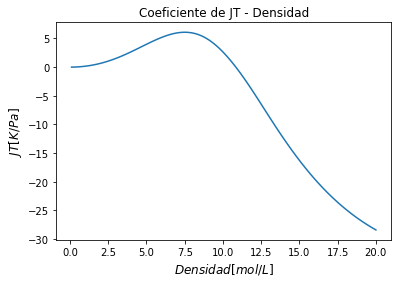

In [26]:
plt.plot(density_range, jts)
plt.title('Coeficiente de JT - Densidad')
plt.xlabel(r'$Densidad[mol/L]$',fontsize=12)
plt.ylabel(r'$JT [K/Pa]$',fontsize=12)
plt.show()

#### Ejemplo de uso incorrecto

In [27]:
# Nombre de compuesto incorrecto
bad_composition = {'methane': 0.5, 'wasser':0.5}

fluid = Fluid(model=GERG2008(), temperature=temperature, 
              composition=bad_composition, density=density)

/home/ruther/docs/research/thermo/algos/pff/pyforfluids/models/gerg2008.py:81: UserWarning: GERG2008 Valid Components:
{'nonane', 'propane', 'carbon_monoxide', 'hydrogen', 'oxygen', 'isobutane', 'hexane', 'octane', 'hydrogen_sulfide', 'carbon_dioxide', 'nitrogen', 'heptane', 'ethane', 'water', 'methane', 'helium', 'decane', 'isopentane', 'butane', 'pentane', 'argon'}
  warnings.warn(


ValueError: '{'wasser'}' ain't valid components

In [28]:
# Fijar presión y densidad simultáneamente
fluid = Fluid(model=GERG2008(), temperature=temperature, 
              composition=composition, density=density, pressure=pressure)

ValueError: Can't define pressure and density at the same time

### Estructura de la presentación
---
- Introducción
- Modelos Termodinámicos
    - GERG-2008
- Arquitectura e implementación del paquete
    - Desarrollo en Fortran
    - Desarrollo en Python
    - Testing
    - Integración Continua
- Ejemplo de uso
- **Conclusiones y perspectivas a futuro**

### Conclusiones y perspectivas futuras
---
#### Conclusiones

- PyForFluids es una herramienta que aprovecha tanto código veloz desarrollado en Fortran 95 como la extensibilidad y practicidad de Python dentro de un mismo paquete.
- Está diseñado para ser fácilmente utilizado y actualizado. Para esto último, se apoya en el sistema de integración continua que verifica el correcto funcionamiento del código luego de cada agregado o modificación realizada.


#### Perspectivas a futuro
- PyForFluids es una herramienta en desarrollo y posee un gran potencial de crecimiento.
- Actualmente está en su versión 0.0.1-a1.
- Próximas actualizaciones:
    - **Incorporación** de múltiples **modelos** termodinámicos. Creación de una **base de datos** que contenga parámetros utilizados por los mismos.
    - Permitirle al usuario emplear sus **propios parámetros** obtenidos del ajuste de datos experimentales.
    - Incorporar cálculos relacionados a **equilibrio de fases**: cálculos flash, estabilidad de fases, trazado de diagramas de equilibrio.
- **Criterio de calidad:** Para garantizar el correcto funcionamiento del paquete a medida que se agregan funcionalidades se considera fundamental no solo mantener el nivel de coverage mayor a 95%, sino también profundizar los tests realizados, como por ejemplo, añadir *testing basado en propiedades*.

# Muchas gracias!

# Referencias

- Champman, W., Gubbins, K., & Jackson, G. Radosz, M. 1989, Fluid Phase Equilibria, 52, 31
- Chaparro, G. & Mejía, A. 2020, Journal of Computational Chemistry
- Elliot, J. R. & Lira, C. T. 2012, Introductory Chemical Engineering Thermodynamics
- Fowler, M. & Foemmel, M. 2006, Continuous integration
- Kontogeorgis, G., Voutsas, E., Yankoumis, I., & Tassios, D. 1996, Industrial & Engineering Chemistry Research
- Kunz, O. & Wagner, W. 2012, Journal of Chemical and Engineering Data
- Papaioannou, V., Calado, F., Laffite, T., et al. 2015, Fluid Phase Equilibria
- Peng, D. & Robinson, D. 1975, Industrial and Engineering Chemical Fundamentals
- Soave, G. 1971, Chemical Engineering Science
- Span, R. 2000, Multiparameter Equations of state